In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [3]:
df=pd.read_excel('/content/gdrive/My Drive/master.xlsx')

In [4]:
%cd '/content/gdrive/My Drive/temp'


/content/gdrive/My Drive/temp


In [5]:
%rm ./*

In [6]:
%ls

In [7]:
columns=df.columns
numDims = len(columns)
cardinality = [len(df[col]) for col in df.columns]
alphabets=[chr(i) for i in range(ord('a'),ord('z')+1)]


col_dict = {}

for i in range(numDims):
  col_dict[columns[i]] = alphabets[i]


def BUC(input, d, minsup,cube="", datacube=""):
  allcubes=[]
  for dim in range(d,len(columns)):
    col = str(columns[dim])
    x = input[col].value_counts()
    for a in x.iteritems():
      val = a[0]
      if(a[1]>minsup):
        ndf = input[input[col]==val]
        file = cube+col_dict[col]+".txt"
        with open(file, 'a') as f:
          if(file not in allcubes):
            allcubes.append(file)
          # print(file,len(ndf))
          f.write(datacube +" "+ str(val) +"="+ str(len(ndf)) + "\n")
          f.close()
        x = BUC(ndf,dim+1,minsup, cube+col_dict[col], datacube+" "+str(val))
        for a in x:
          if a not in allcubes:
            allcubes.append(a)
  return allcubes

In [8]:
buccubes=BUC(df,0,1000)

In [9]:
print(len(buccubes))

20


In [11]:
%cd '/content/gdrive/My Drive/temp1'

/content/gdrive/My Drive/temp1


In [12]:
%rm ./*

In [13]:
def BUC1(input,d,minsup, cube="", datacube=""):
  allcubes=[]
  ln=len(columns)
  if(d==0):
    ln=1
    
  for dim in range(d,ln):
    # print(dim)
    col = str(columns[dim])
    x = input[col].value_counts()
    for a in x.iteritems():
      val = a[0]
      if(a[1]>minsup):
        ndf = input[input[col]==val]
        file = cube+col_dict[col]+".txt"
        with open(file, 'a') as f:
          if(file not in allcubes):
            allcubes.append(file)
          # print(file,len(ndf))
          f.write(datacube +" "+ str(val) +"="+ str(len(ndf)) + "\n")
          f.close()
        x = BUC1(ndf,dim+1,minsup, cube+col_dict[col], datacube+" "+str(val))
        for a in x:
          if a not in allcubes:
            allcubes.append(a)
  return allcubes

In [14]:
def partition(col,minsup):
  %rm ../partition/*
  files=[]
  unique_vals = df[col].unique()
  for i in range (len(unique_vals)):
    ndf = df[df[col]==unique_vals[i]]
    if(len(ndf)>minsup):
      ndf.to_csv('../partition/'+str(i)+'.csv', sep='\t', encoding='utf-8')
      files.append(i)
  return files

def paging(mem,minsup):
  cubes=[]
  for col in df.columns:
    
    pdata =[]
    n=0
    unique_vals = df[col].unique()
    f = partition(col,minsup)
    for i in f:
      fs = os.path.getsize('../partition/'+str(i)+'.csv')
      if(fs + n > mem):
        # print(len(pdata),fs,n)
        pdf = pd.concat(pdata)
        n=0
        x=BUC1(pdf,df.columns.get_loc(col),minsup)
        for a in x:
          if a not in cubes:
            cubes.append(a)
        pdata=[]
      ndf = pd.read_csv('../partition/'+str(i)+'.csv',sep='\t')
      pdata.append(ndf)
      n+= fs
    if(n>0):
      pdf = pd.concat(pdata)
      x=BUC1(pdf,df.columns.get_loc(col),minsup)
      for a in x:
        if a not in cubes:
          cubes.append(a)

  return cubes


cubes = paging(1500000,1000)

rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory


In [15]:
print(cubes)

['b.txt', 'c.txt', 'cd.txt', 'cl.txt', 'ce.txt', 'ceg.txt', 'cg.txt', 'd.txt', 'dl.txt', 'e.txt', 'eg.txt', 'g.txt', 'l.txt', 'cdl.txt', 'de.txt', 'deg.txt', 'dg.txt', 'egl.txt', 'el.txt', 'gl.txt']


In [16]:
len(cubes)

20

In [17]:
for file in cubes:
  file_dict={}
  with open(file, 'r') as f:
    lines = f.readlines()
    for line in lines:
      k,v = line.split('=')
      if k in file_dict.keys():
        file_dict[k]=max(file_dict[k],int(v[:-1]))
      else:
        file_dict[k]=int(v[:-1])
  open(file, "w").close()
  with open(file, 'a') as f:
    for k,v in file_dict.items():
      f.write(k+"="+str(v)+"\n")
    f.close()

In [18]:
cubes.sort()
buccubes.sort()
for i in range(20):
  print(cubes[i],buccubes[i])

b.txt b.txt
c.txt c.txt
cd.txt cd.txt
cdl.txt cdl.txt
ce.txt ce.txt
ceg.txt ceg.txt
cg.txt cg.txt
cl.txt cl.txt
d.txt d.txt
de.txt de.txt
deg.txt deg.txt
dg.txt dg.txt
dl.txt dl.txt
e.txt e.txt
eg.txt eg.txt
egl.txt egl.txt
el.txt el.txt
g.txt g.txt
gl.txt gl.txt
l.txt l.txt


plots

**1) A plot of minsup vs. runtime, keeping allotted memory fixed**

In [197]:
import time
x=[]
y=[]
for i in range(500,5000,500):
  %cd '/content/gdrive/My Drive/temp'
  %rm ./*
  x.append(i)
  st= time.time()
  res = BUC(df,0,i)
  et = time.time()
  y.append(et-st)

/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp
/content/gdrive/My Drive/temp


In [198]:
print(x)
print(y)

[500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
[1.7736690044403076, 0.9425740242004395, 0.6526634693145752, 0.593339204788208, 0.40611958503723145, 0.3094046115875244, 0.2895939350128174, 0.2923309803009033, 0.23499774932861328]


Text(0, 0.5, 'time taken')

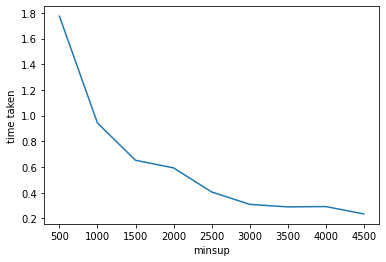

In [199]:
plt.plot(x,y)
plt.xlabel('minsup')
plt.ylabel('time taken')

As min sup increases, the number of itemsets decreases, thus it takes less time to complete the algo

**2) A plot of allotted memory vs. runtime, keeping minsup fixed.**

In [200]:
x1=[]
y1=[]
for i in range(1500000,5000000,1000000):
  %cd '/content/gdrive/My Drive/temp1'
  %rm ./*
  x1.append(i)
  st= time.time()
  res = paging(i,1000)
  et = time.time()
  y1.append(et-st)

/content/gdrive/My Drive/temp1
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
/content/gdrive/My Drive/temp1
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
/content/gdrive/My Drive/temp1
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No such file or directory
rm: cannot remove '../partition/*': No 

In [201]:
print(x1,y1)

[1500000, 2500000, 3500000, 4500000] [24.45358443260193, 24.442143201828003, 24.477418422698975, 24.541354656219482]


Text(0, 0.5, 'time taken')

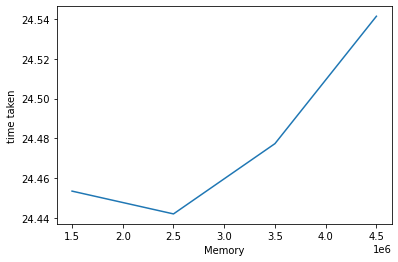

In [202]:
plt.plot(x1,y1)
plt.xlabel('Memory')
plt.ylabel('time taken')

from the above picture, we can see that the graph is gradually increases. this is because, since the memory increases, we tend to put more pages into a singal memory frame and then combining all it takes more time